# Proyecto Desicion Tree - Luis Alpizar

##  Predecir en base a medidas diagnósticas si un paciente tiene o no diabetes

## Paso 0: Importar Librerias

In [17]:
# Importacion de Librerias
# Registros y serialización
import logging
import pickle

# Análisis de datos
import pandas as pd
import numpy as np

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Modelado y evaluación
from sklearn.model_selection import (
    train_test_split,
    cross_validate,
    cross_val_predict,
    GridSearchCV
)

# Pipelines
from sklearn.pipeline import Pipeline

# Preprocesamiento
from sklearn.preprocessing import (
    PowerTransformer,
    LabelEncoder,
    MinMaxScaler
)

# Árboles de decisión
from sklearn.tree import (
    DecisionTreeClassifier,
    plot_tree
)

# Métricas
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    DetCurveDisplay
)

# Inspección
from sklearn.inspection import permutation_importance

# Configuración del registro
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

## Paso 1: Carga del dataset

In [18]:
url = ('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df_raw = pd.read_csv(url)
df_raw.info()
df_raw.sample(10, random_state= 2025)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
82,7,83,78,26,71,29.3,0.767,36,0
152,9,156,86,28,155,34.3,1.189,42,1
393,4,116,72,12,87,22.1,0.463,37,0
691,13,158,114,0,0,42.3,0.257,44,1
14,5,166,72,19,175,25.8,0.587,51,1
542,10,90,85,32,0,34.9,0.825,56,1
749,6,162,62,0,0,24.3,0.178,50,1
629,4,94,65,22,0,24.7,0.148,21,0
724,1,111,94,0,0,32.8,0.265,45,0
222,7,119,0,0,0,25.2,0.209,37,0



## Paso 2: Data preprocessing

In [19]:
df_baking = df_raw.copy()
df_baking.columns = df_baking.columns.str.lower()

In [20]:
display(df_baking.describe(include='number').T)

,count,mean,std,min,25%,50%,75%,max
pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
bmi,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [21]:
df_baking.isna().sum()
df_baking.isnull().sum()

,0
pregnancies,0
glucose,0
bloodpressure,0
skinthickness,0
insulin,0
bmi,0
diabetespedigreefunction,0
age,0
outcome,0


In [22]:
df_y = df_baking['outcome']
df_y.value_counts()

,count
outcome,
0,500
1,268


In [23]:
df = df_baking.copy()



## Paso 3: Exploratory Data Analysis

In [60]:
#División de los datos en entrenamiento y prueba
df_train, df_test = train_test_split(df, random_state=2025,test_size=0.2)
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)



df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               614 non-null    int64  
 1   glucose                   614 non-null    int64  
 2   bloodpressure             614 non-null    int64  
 3   skinthickness             614 non-null    int64  
 4   insulin                   614 non-null    int64  
 5   bmi                       614 non-null    float64
 6   diabetespedigreefunction  614 non-null    float64
 7   age                       614 non-null    int64  
 8   outcome                   614 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 43.3 KB


In [25]:
display(df_train.describe(include='number').T)

,count,mean,std,min,25%,50%,75%,max
pregnancies,614.0,3.762215,3.360184,0.000,1.00000,3.00,6.0000,17.00
glucose,614.0,120.623779,30.987291,0.000,99.25000,117.00,139.0000,199.00
bloodpressure,614.0,69.148208,18.293846,0.000,62.00000,70.00,80.0000,122.00
skinthickness,614.0,20.910423,15.980416,0.000,0.00000,23.00,32.0000,99.00
insulin,614.0,82.547231,117.208088,0.000,0.00000,44.00,130.0000,846.00
bmi,614.0,31.874430,7.751197,0.000,27.30000,32.00,36.5000,67.10
diabetespedigreefunction,614.0,0.477060,0.336851,0.078,0.24425,0.38,0.6355,2.42
age,614.0,32.583062,11.308896,21.000,24.00000,29.00,39.0000,81.00
outcome,614.0,0.333876,0.471981,0.000,0.00000,0.00,1.0000,1.00


Analisis univariado

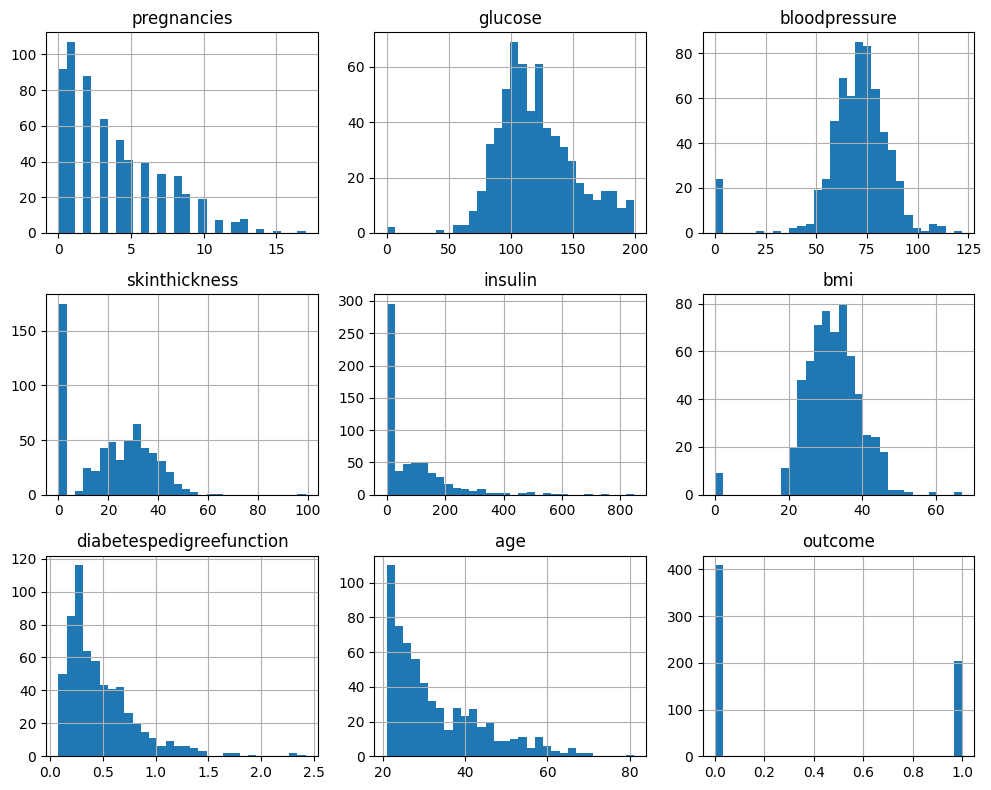

In [55]:
df_train.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

- Analisis bivariado

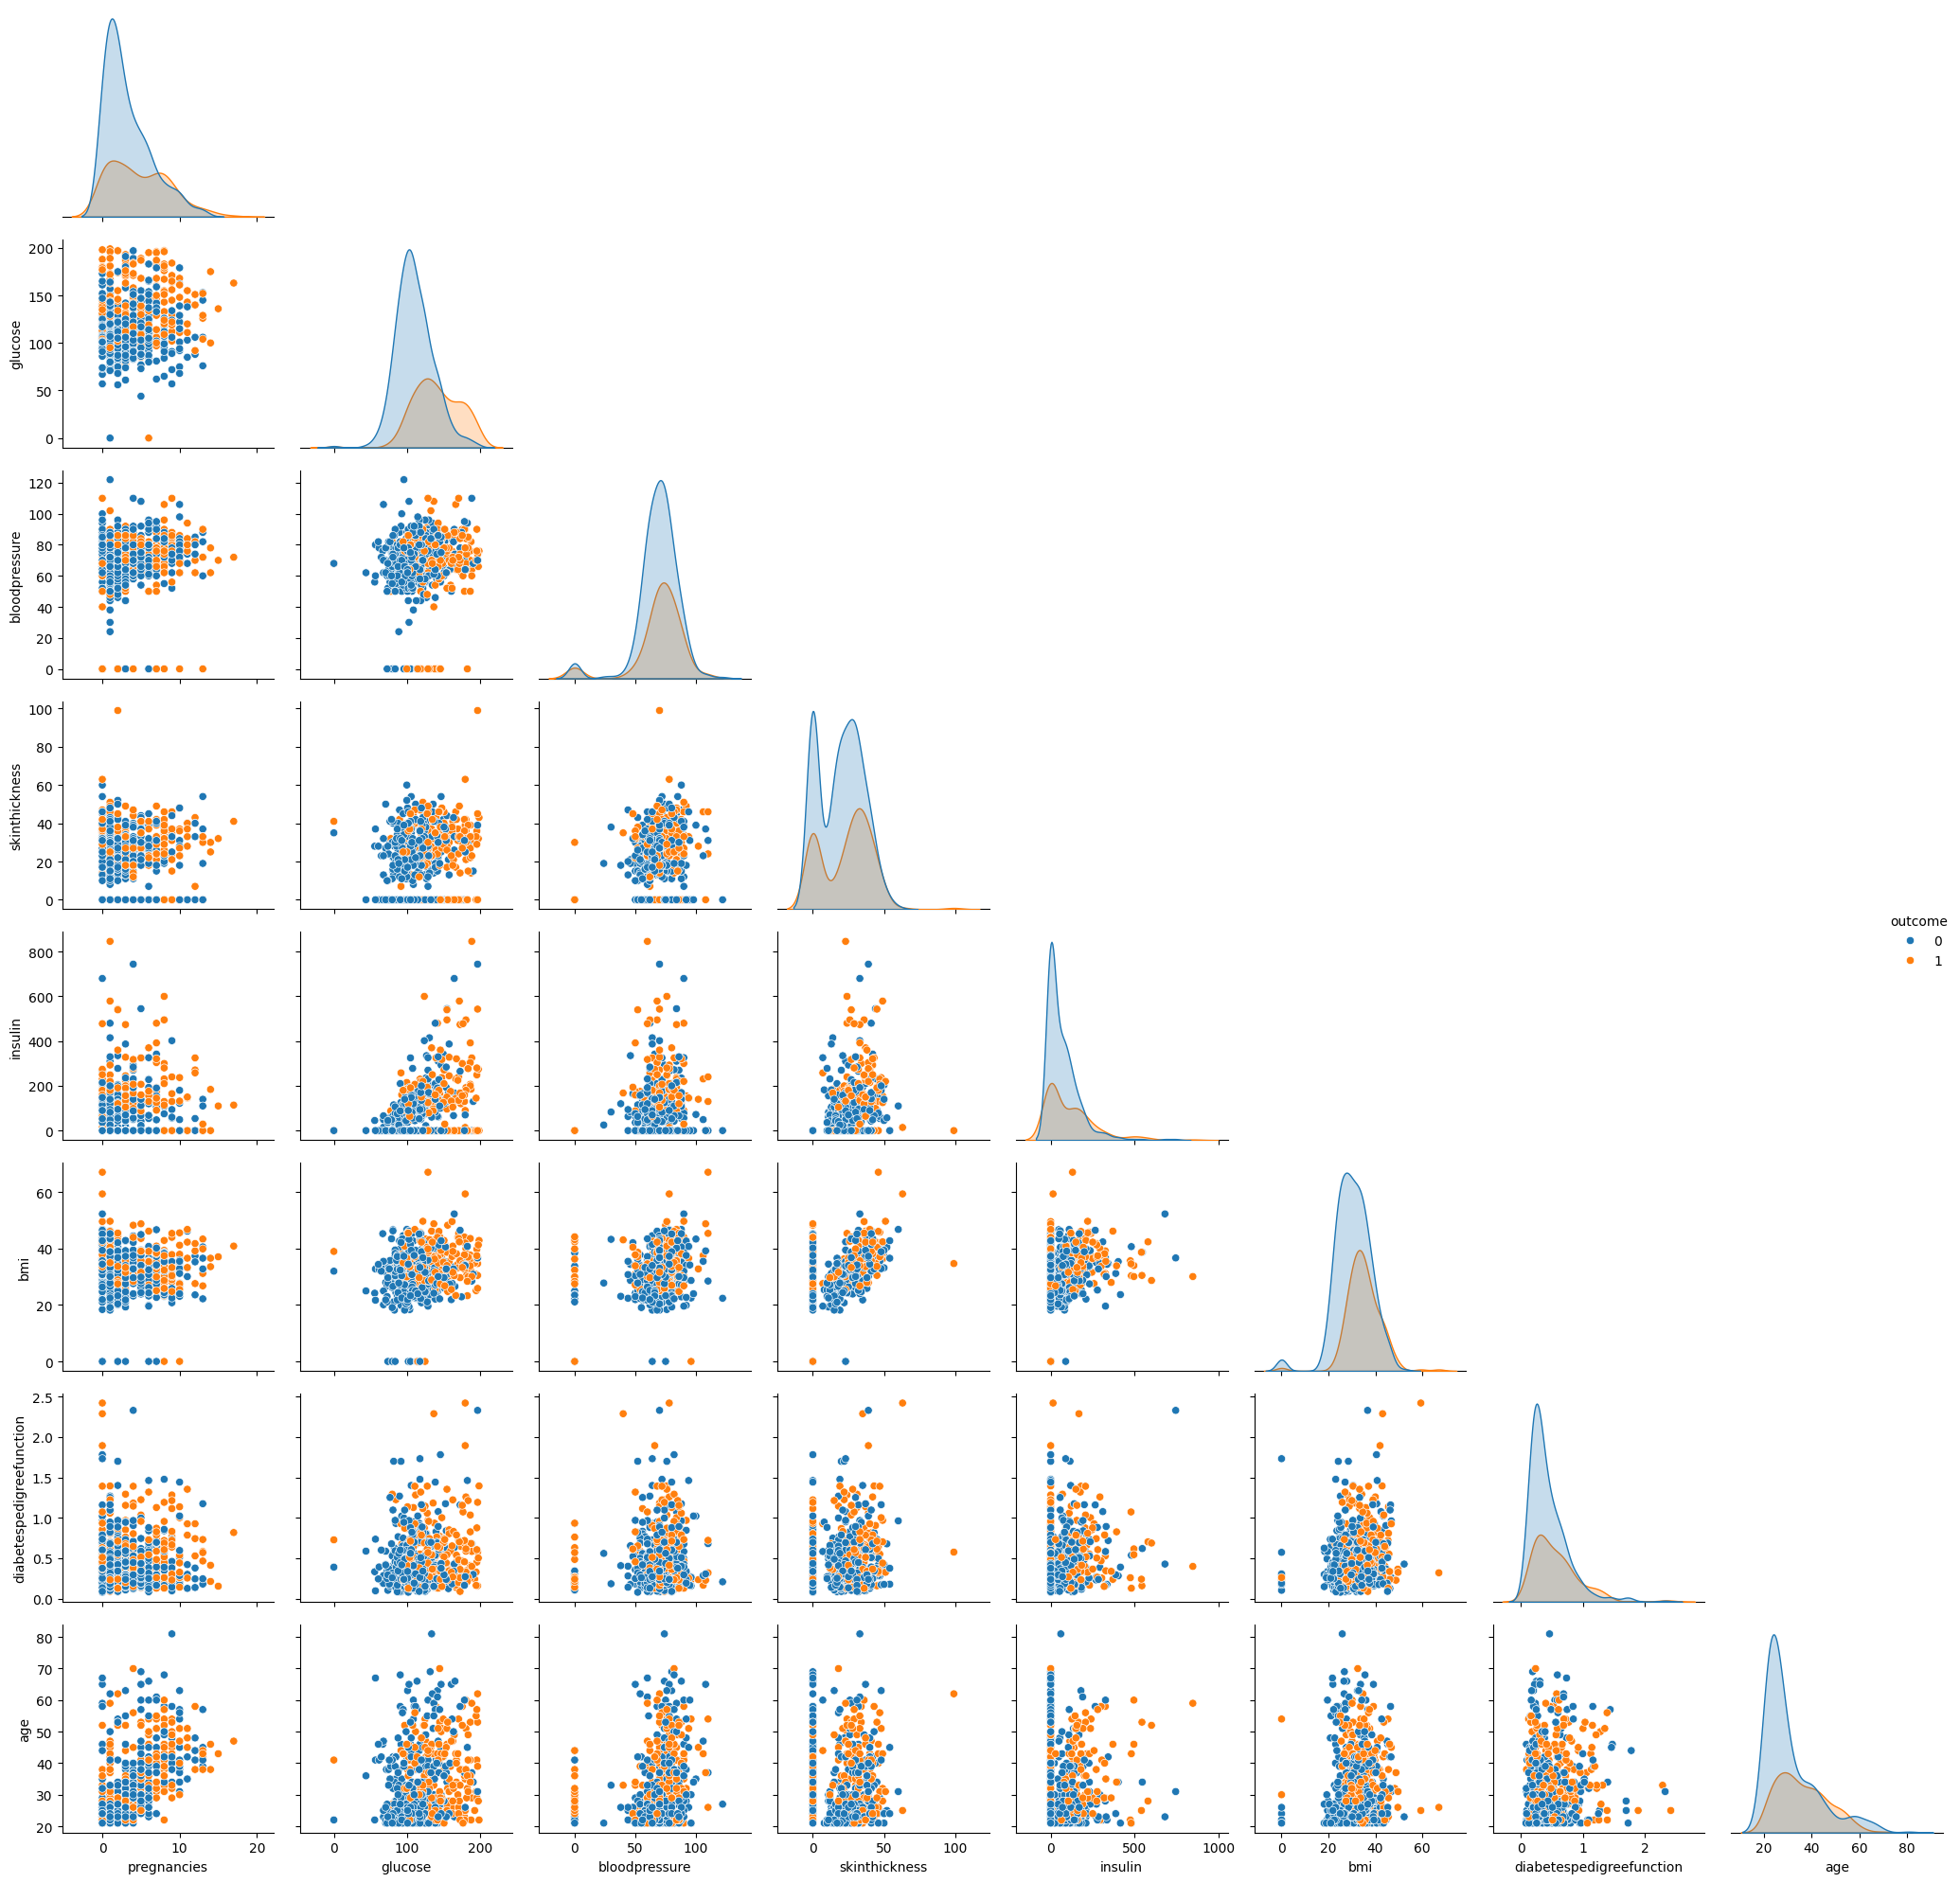

In [27]:
sns.pairplot(data=df_train,hue='outcome', corner=True)
plt.tight_layout()
plt.show()

- Correalaciones

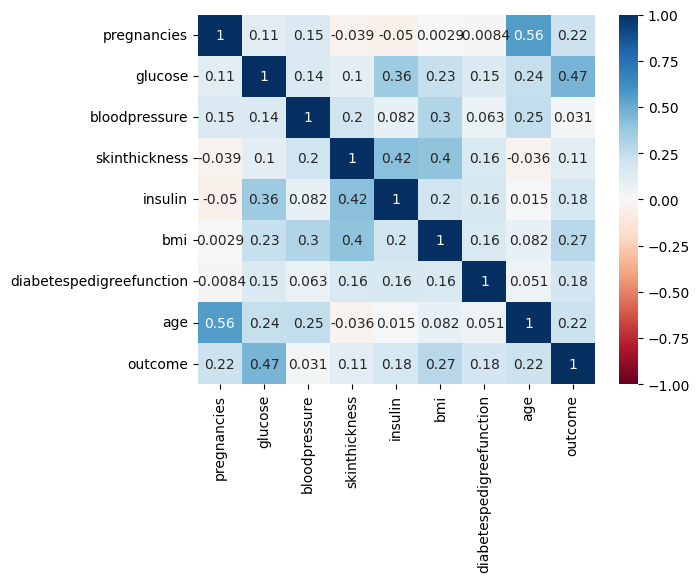

In [ ]:
sns.heatmap(data=df_train.select_dtypes('number').corr(),vmin=-1,vmax=1,cmap='RdBu',annot=True)
plt.show()

## Paso 4: Machine Learning

In [28]:
X_train = df_train.drop(['outcome'],axis=1)
y_train = df_train['outcome']

X_test = df_test.drop(['outcome'],axis=1)
y_test = df_test['outcome']

display(X_train.head())
display(y_train.head())



,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,14,175,62,30,0,33.6,0.212,38
1,4,90,88,47,54,37.7,0.362,29
2,1,136,74,50,204,37.4,0.399,24
3,2,96,68,13,49,21.1,0.647,26
4,11,85,74,0,0,30.1,0.300,35


,outcome
0,1
1,0
2,0
3,0
4,0


In [29]:
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
y_hat = clf_tree.predict(X_test)
y_hat

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [41]:
print(f"Accuracy: {accuracy_score(y_test, y_hat):.2f}")
print(  f"F1 Score: {f1_score(y_test, y_hat):.2f}")

Accuracy: 0.74
F1 Score: 0.67


              precision    recall  f1-score   support

           0       0.77      0.80      0.78        91
           1       0.69      0.65      0.67        63

    accuracy                           0.74       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.74      0.74      0.74       154



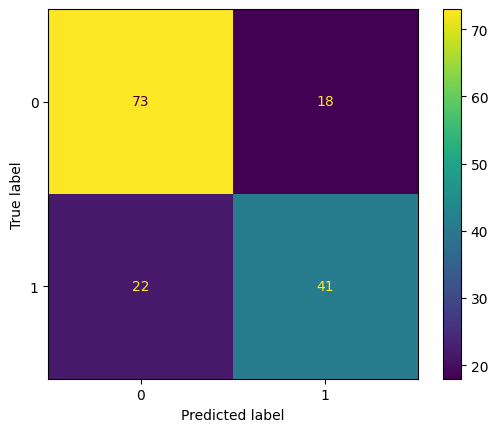

In [43]:
fig,ax = plt.subplots()
print(classification_report(y_test, y_hat))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat,ax=ax)
plt.show()

Interpretación:

   -  Accuracy: El modelo tiene una precisión del 74%, lo que significa que el 74% de las predicciones fueron correctas.
   -  Precision: La precisión del modelo es del 69%, lo que indica que el 69% de las predicciones positivas fueron correctas.
   -  Recall (Sensibilidad): La sensibilidad del modelo es del 65%, lo que significa que el 65% de los casos positivos reales fueron correctamente identificados.
   -  F1 Score: La puntuación F1 es del 67%, que es una medida combinada de precisión y sensibilidad.


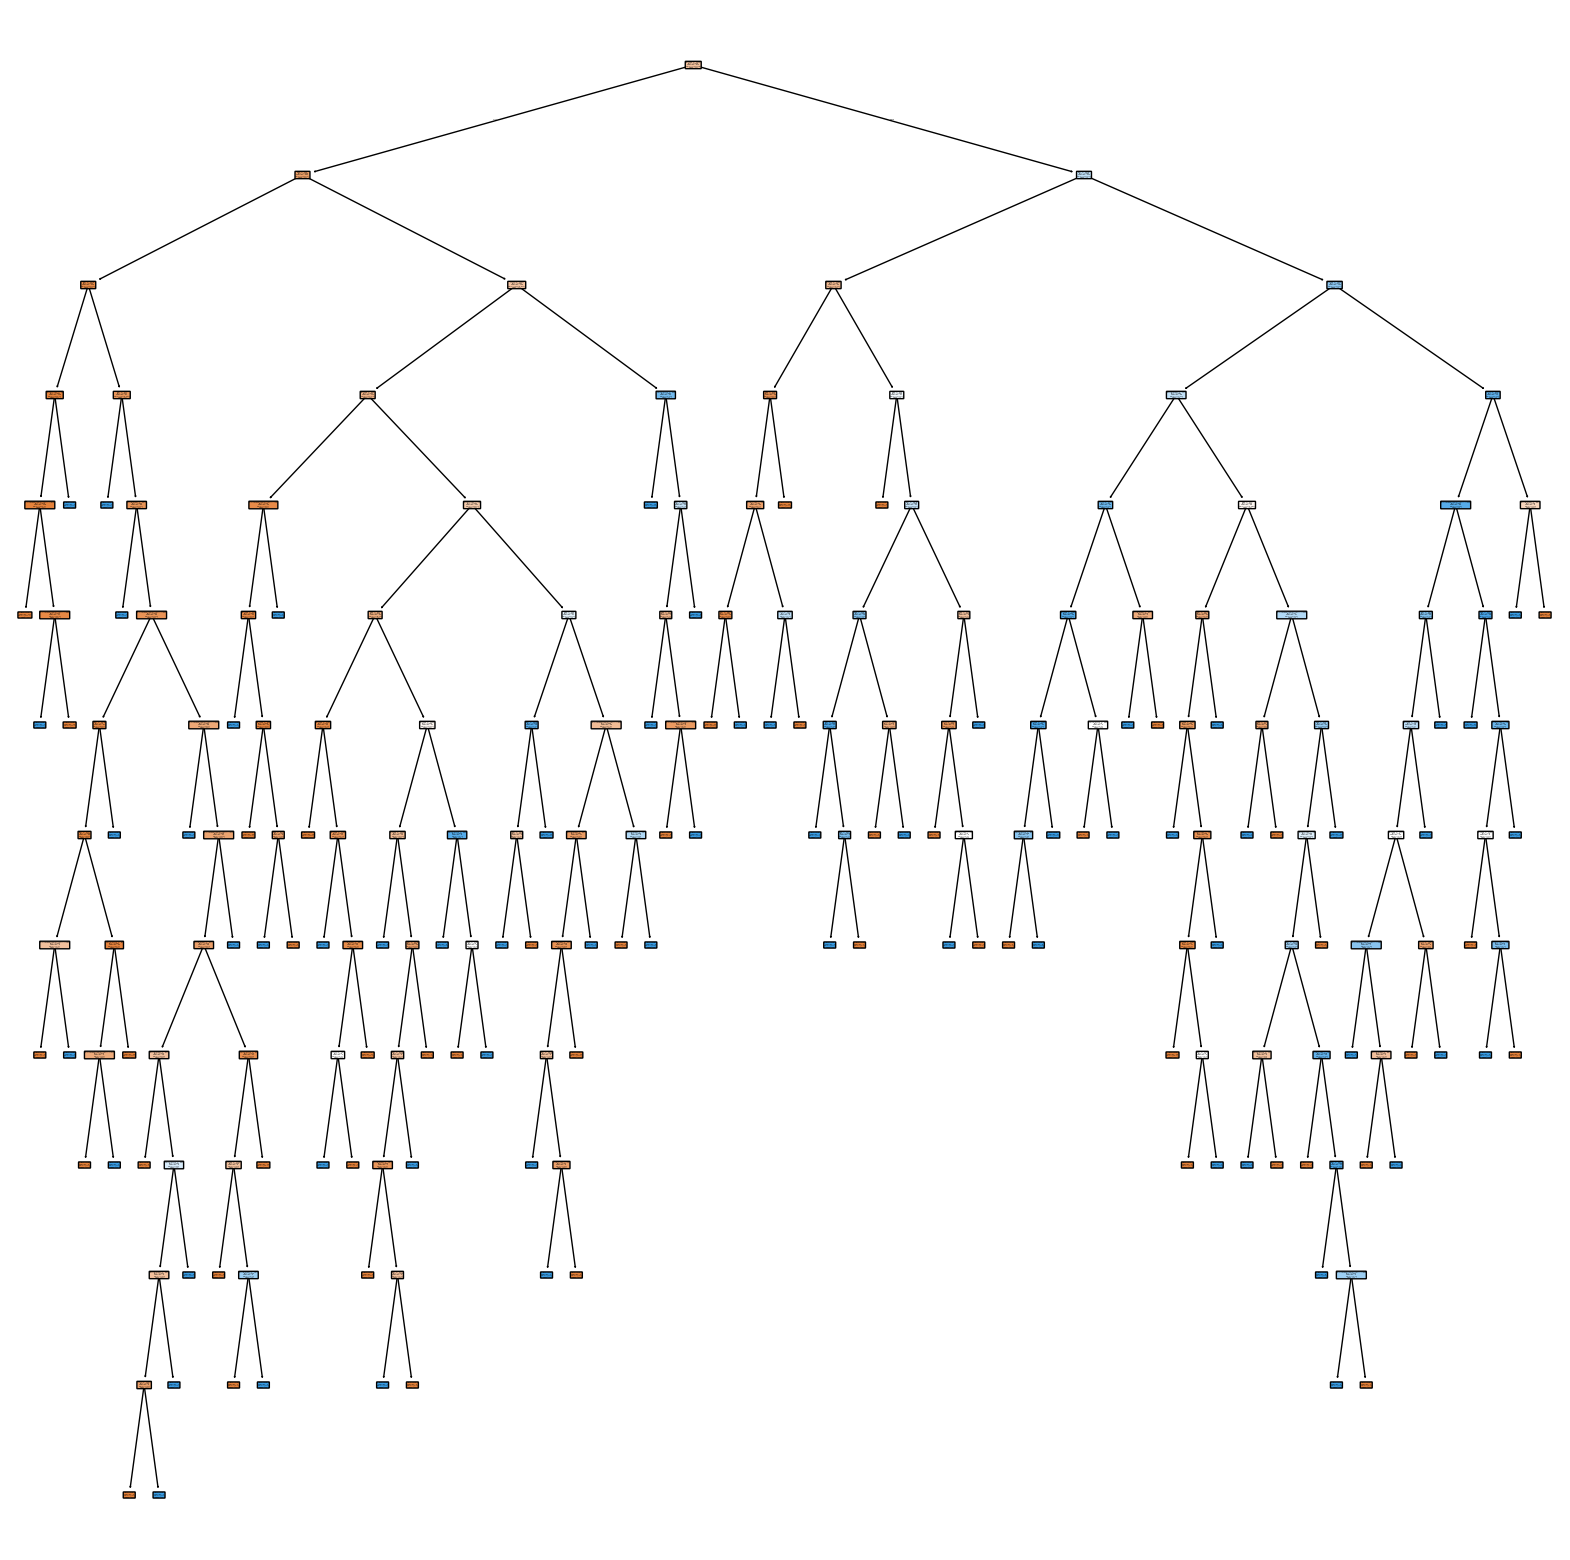

In [45]:
plt.figure(figsize=(20,20))
plot_tree(clf_tree, feature_names=X_train.columns, rounded= True,class_names=['No','Si'], filled=True)
#plt.tight_layout()
plt.show()

## Paso 5: Ajuste del modelo

In [46]:
clf_tree = DecisionTreeClassifier(
    class_weight="balanced", #Pondera ambas clases y le da mas peso a la clase minoritaria y menos peso a la mayoritaria
    max_depth=3 #Ajusta la cantidad de niveles a 3
    )
clf_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

In [47]:
y_hat = clf_tree.predict(X_test)
y_hat

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [48]:
print(f"Accuracy: {accuracy_score(y_test, y_hat):.2f}")
print(  f"F1 Score: {f1_score(y_test, y_hat):.2f}")

Accuracy: 0.68
F1 Score: 0.68


              precision    recall  f1-score   support

           0       0.82      0.59      0.69        91
           1       0.58      0.81      0.68        63

    accuracy                           0.68       154
   macro avg       0.70      0.70      0.68       154
weighted avg       0.72      0.68      0.68       154



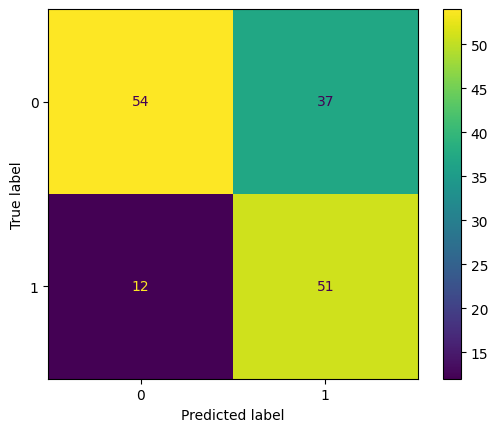

In [49]:
fig,ax = plt.subplots()
print(classification_report(y_test, y_hat))
ConfusionMatrixDisplay.from_predictions(y_test, y_hat,ax=ax)
plt.show()

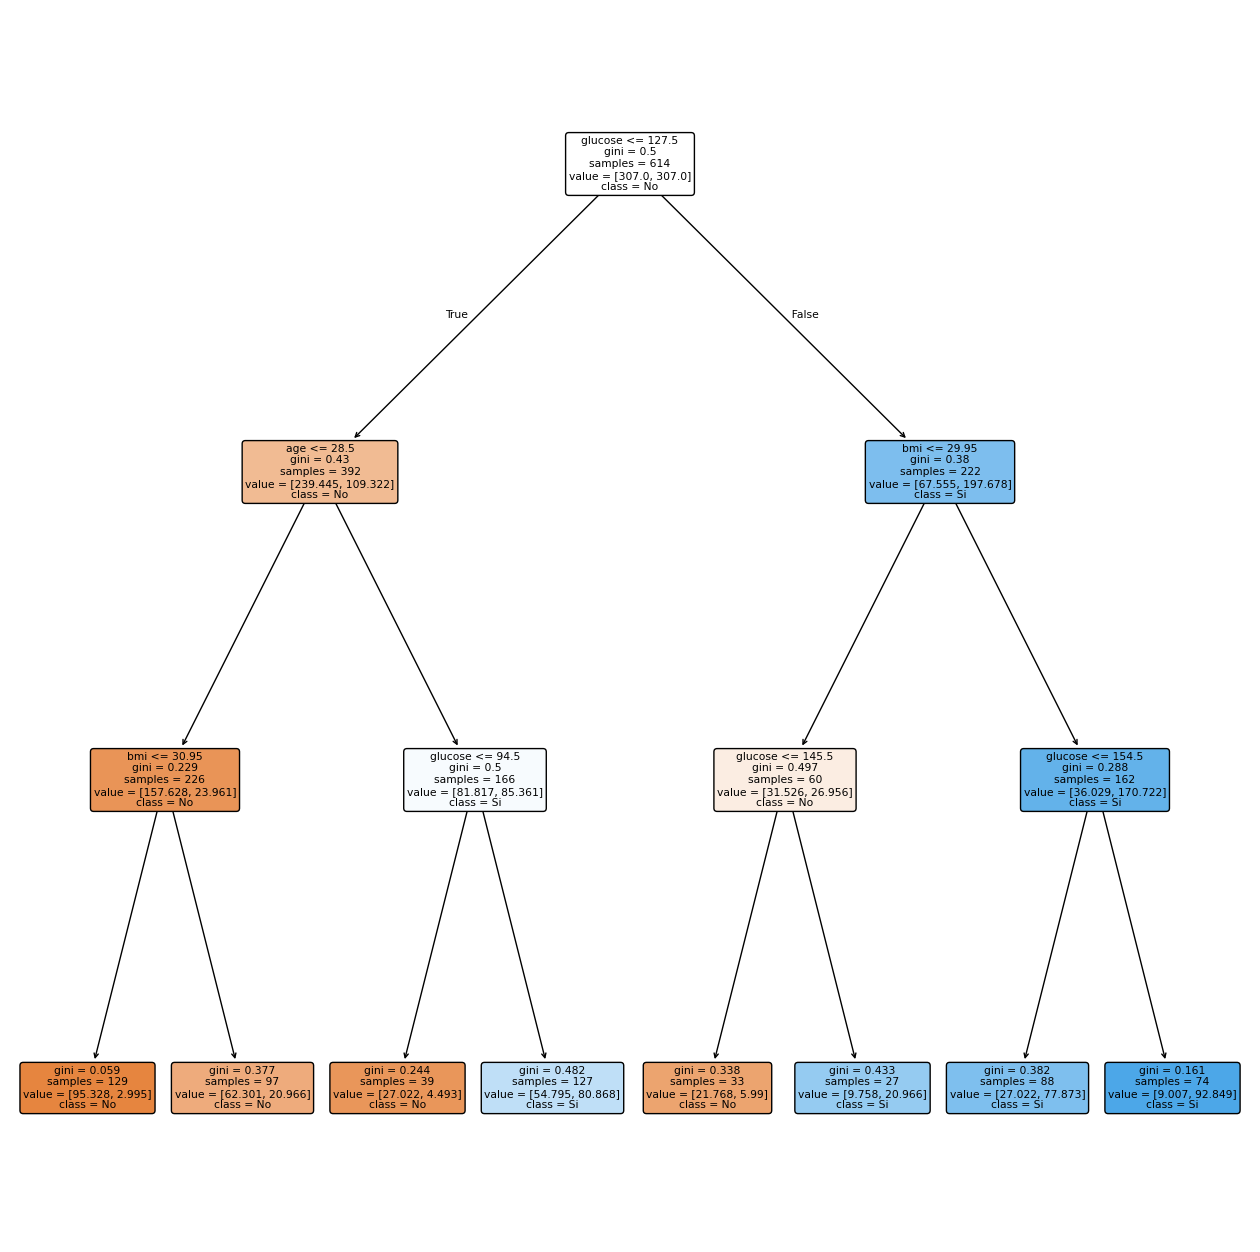

In [50]:
plt.figure(figsize=(16,16))
plot_tree(clf_tree, feature_names=X_train.columns, rounded= True,class_names=['No','Si'], filled=True)
#plt.tight_layout()
plt.show()

Interpretacion

- Glucosa es la variable que mejor separa las clases por lo quie el modelo la toma primero. Glusosa >=127,5.

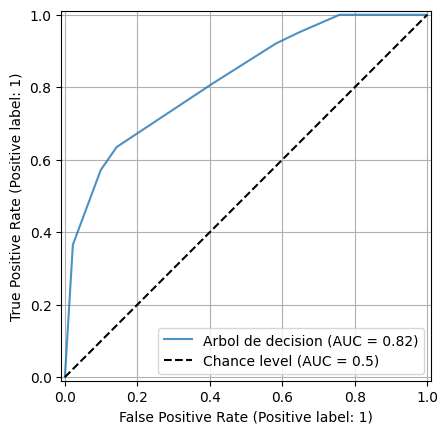

In [53]:
RocCurveDisplay.from_estimator(
    clf_tree,
    X_test,
    y_test,
    plot_chance_level=(True),
    name="Arbol de decision",
    alpha=0.8,
)
plt.grid(True)
plt.show()

- 82%(AUC) de las veces el algoritmo va a ser correcto.